FFR 120  
Felix Waldschock

HW 3 
Exercise 12.2
## The Watts-Strogatz small-world model

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','grid'])
from tqdm import trange


In [9]:
# parameters
n = 10             # number of nodes
p = 0.0           # probability of connection
c = 0             # number of connections to nearest neighbours (even)

# check if c is even
if c%2 != 0:
    raise ValueError("c must be even")


In [10]:
# generate the watts-strogatz network
def generateWattsStrogatz(n,p,c):
    A = np.zeros((n,n))
    # connect the nearest neighbours
    for i in range(n):
        for b in range(c):
            A[i,(i+int(b/2)+1)%n] = 1
            A[(i+int(b/2)+1)%n,i] = 1

    # rewire exisiting edges, to nodes that are not already connected
    for i in range(n):
        for j in range(i,n):
            
            # check if edge exists
            if A[i,j] == 1:
                if np.random.rand() < p:
                    # kill the edge and create a new one, between i and k, where k is  not connected yet
                    A[i,j] = 0
                    A[j,i] = 0

                    # find a node k, that is not connected to i
                    k = np.random.randint(0,n)
                    while A[i,k] == 1:
                        k = np.random.randint(0,n)

                    # create the new edge
                    A[i,k] = 1
                    A[k,i] = 1

    return A  


In [11]:
n_a = 20
p_a = 1
c_a = 4
c_aa = 8

n_b = 20
p_b = 0.2
c_b = 4
c_bb = 8

n_c = 20
p_a = 0
c_c = 2
p_ac = 0.2

A_c = generateWattsStrogatz(n_c,p_a,c_c)
A_cc = generateWattsStrogatz(n_c,p_ac,c_c)
A_a = generateWattsStrogatz(20,1,4)
A_aa = generateWattsStrogatz(n_a,p_a,c_aa)
A_b = generateWattsStrogatz(n_b,p_b,c_b)
A_bb = generateWattsStrogatz(n_b,p_b,c_bb)


In [12]:
print(A_b)

[[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.

In [13]:
def plot_ErdosRenyi(A, ax, title):
    # Get the number of nodes
    n = A.shape[0]

    # Calculate the angular spacing for nodes on the circle
    dAngle = 2 * np.pi / n

    # Set the radius of the circle
    r = 1

    # Calculate the coordinates of nodes on the circle
    x = r * np.cos(np.linspace(0, 2 * np.pi, n+1))
    y = r * np.sin(np.linspace(0, 2 * np.pi, n+1))

    # Plot nodes as blue circles
    ax.plot(x, y, 'o', color='blue')

    # Plot edges according to the Adjacency matrix A
    for i in range(n):
        for j in range(n):
            if A[i, j] == 1:
                ax.plot([x[i], x[j]], [y[i], y[j]], color='red')
    ax.set_title(title)
    # scale axes equally
    ax.axis('equal')

    # Turn off axis for cleaner visualization
    ax.axis('off')

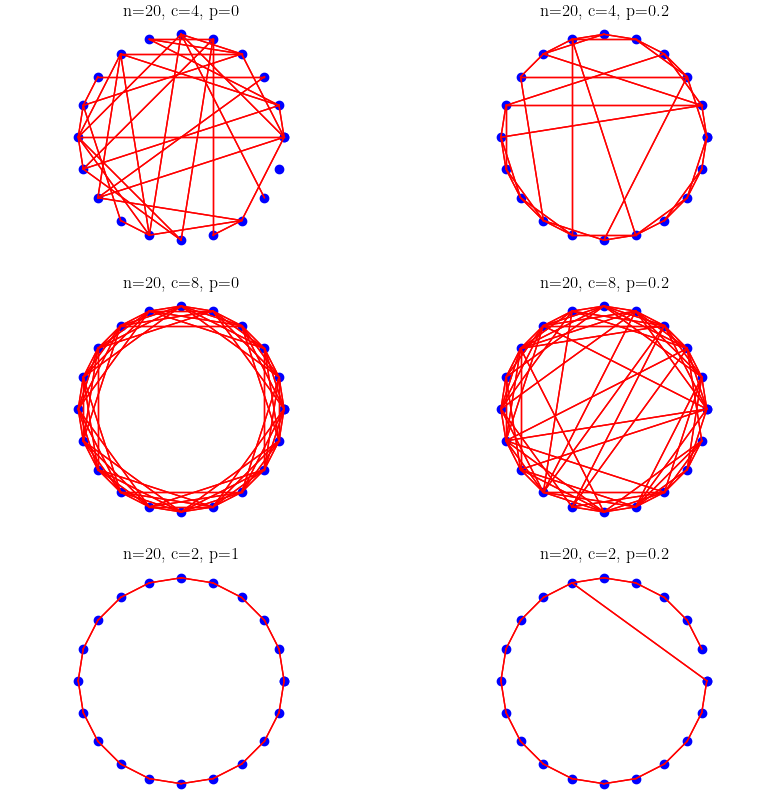

In [14]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

# Plot the two matrices and hand over their parameters, n c p

plot_ErdosRenyi(A_a, axes[0,0], f"n={n_a}, c={c_a}, p={p_a}")
plot_ErdosRenyi(A_aa, axes[1,0], f"n={n_a}, c={c_aa}, p={p_a}")
plot_ErdosRenyi(A_b, axes[0,1], f"n={n_b}, c={c_b}, p={p_b}")
plot_ErdosRenyi(A_bb, axes[1,1], f"n={n_b}, c={c_bb}, p={p_b}")
plot_ErdosRenyi(A_c, axes[2,0], f"n={n_c}, c={c_c}, p={1}")
plot_ErdosRenyi(A_cc, axes[2,1], f"n={n_c}, c={c_c}, p={p_ac}")

# Show the plot
plt.show()